# Trabajo práctico Nº 3: Cúmulos abiertos
## Descargue del Classroom los datos fotométricos y espectroscópicos del cúmulo abierto NGC~2516. Utilizando esos datos, haga lo siguiente:

## 1a)
Grafique los diagramas $(B-V,V)$, $(U-B,V)$ y $(B-V,U-B)$. Señale los límites aproximados que contienen a las estrellas de la secuencia principal del cúmulo en los diagramas color--magnitud.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Para que todas las figuras tengan el mismo tamaño de fuentes es más facil definirlas de manera global
# Además formateo los ticks y el tamaño por defecto de la figura
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

plt.rc('font', family='calibri', size=16)#, serif='STIXGeneral') # fuente por defecto
plt.rc('axes', titlesize=22)     # tamaño de fuente título de axe
plt.rc('axes', labelsize=18)     # tamaño de fuente nombre de ejes
plt.rc('xtick', labelsize=16, direction='in')    # tamaño de fuentes ticks
plt.rc('ytick', labelsize=16, direction='in')    # tamaño de fuentes ticks
plt.rc('legend', fontsize=16)    # tamaño de fuentes referencia
plt.rc('figure', titlesize=24)   # tamaño de fuente título de figura
plt.rc('mathtext', fontset='stix')
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)
plt.rc('xtick.minor', top=False)
plt.rc('xtick.major', size=10)
plt.rc('xtick.minor', size=6)
plt.rc('ytick.major', size=10)
plt.rc('ytick.minor', size=6)

In [3]:
tabla=pd.read_csv('NGC2516_fot.dat', sep='\s+', comment='#',      
                  names=['SBL','Vmag','BV','UB','e_V','e_BV','e_UB','Prob','SpType'])

tabla = tabla.replace(to_replace=99.99, value=np.nan) # Los valores que aparecen como 99.99 o 99.999 en realidad significan
tabla = tabla.replace(to_replace=99.999, value=np.nan) # no hay datos

tabla#.head()

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType
0,594,10.365,0.394,0.117,0.011,0.019,0.016,0.99,F0V
1,485,9.195,0.051,-0.142,0.012,0.013,0.009,0.97,B9pshell
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V
...,...,...,...,...,...,...,...,...,...
1246,1260,16.710,0.674,0.074,0.004,0.024,0.034,NaN,NaN
1247,1261,11.380,0.356,0.064,0.021,0.030,0.021,NaN,NaN
1248,1262,14.698,0.909,0.539,0.003,0.005,0.015,NaN,NaN
1249,1263,16.414,0.742,0.245,0.009,0.009,0.047,NaN,NaN


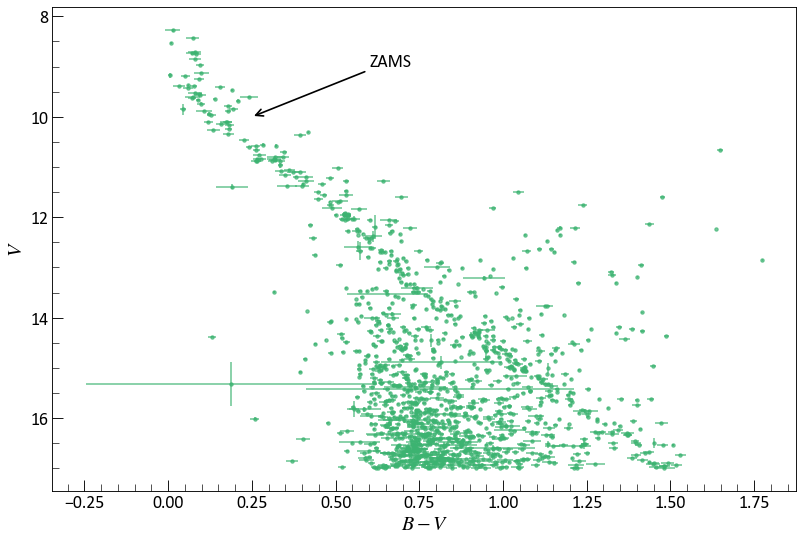

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.errorbar(tabla['BV'],tabla['Vmag'],xerr=tabla['e_BV'], yerr=tabla['e_V'], color = 'mediumseagreen', fmt='.', alpha=0.7)
ax.annotate(text="ZAMS", xy=(0.25, 10), xytext=(0.6, 9),
            arrowprops=dict(arrowstyle="->", lw=1.5))

plt.gca().invert_yaxis()
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

plt.show()

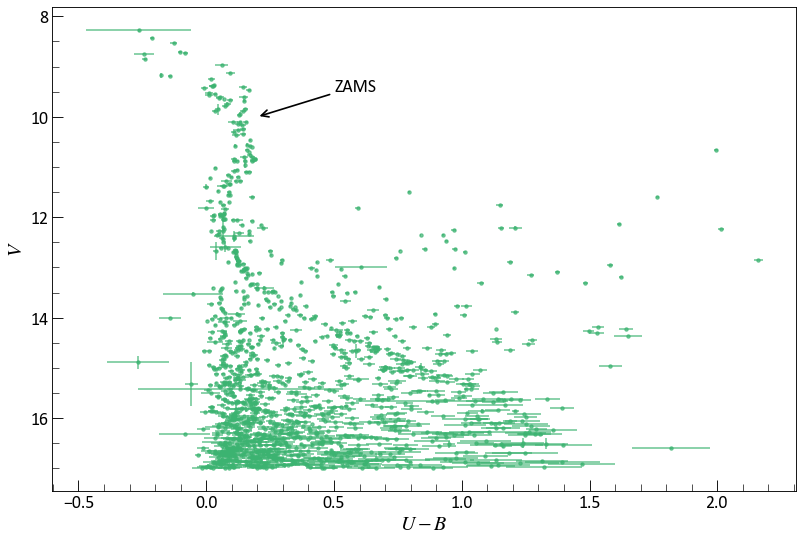

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.errorbar(tabla['UB'],tabla['Vmag'],xerr=tabla['e_UB'], yerr=tabla['e_V'], color = 'mediumseagreen', fmt='.', alpha=0.7)
ax.annotate(text="ZAMS", xy=(0.2, 10), xytext=(0.5, 9.5),
            arrowprops=dict(arrowstyle="->", lw=1.5))

plt.gca().invert_yaxis()
ax.set_xlabel('$U-B$')
ax.set_ylabel('$V$')

plt.show()

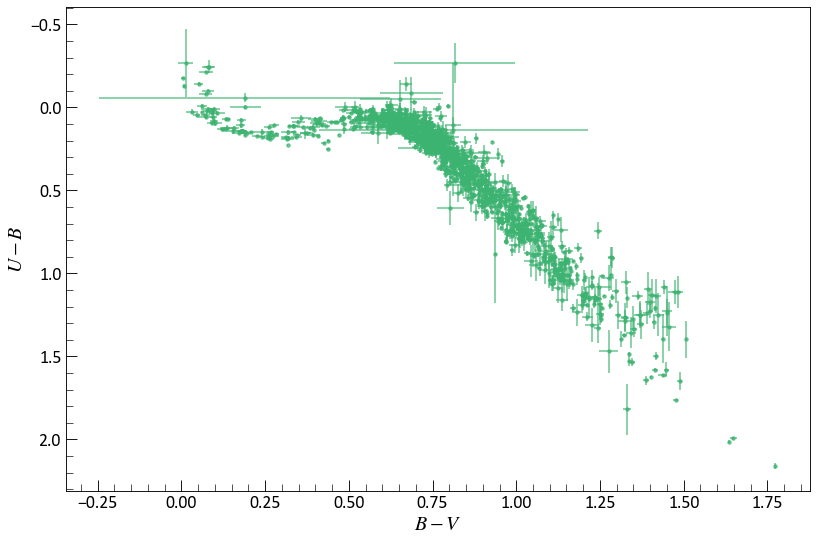

In [6]:
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.errorbar(tabla['BV'],tabla['UB'],xerr=tabla['e_BV'], yerr=tabla['e_UB'], color = 'mediumseagreen', fmt='.', alpha=0.7)

plt.gca().invert_yaxis()
ax.set_xlabel('$B-V$')
ax.set_ylabel('$U-B$')

plt.show()

## 1b)
Estime el exceso de color del cúmulo de las siguientes dos maneras independientes:

-Calcule los excesos de color individuales para las estrellas con tipos espectrales conocidos, usando los colores intrínsecos de la calibración de la secuencia principal de Schmidt--Kaler 
        (tomados de Allen's Astrophysical Quantities, Tabla 15.7, p. 388). La tabla se puede descargar del Classroom. Luego promedie los excesos de color de esas estrellas para obtener una primera estimación del exceso de color del cúmulo. 

In [7]:
# Leo la tabla de Schmidt-Kaler: contiene indices de color intrínsecos y mag absoluta
tabla_sk=pd.read_csv('SecPpal_SK.dat', sep='\s+', comment='#', index_col='Sp',
                names=['Sp','V','BV','UB'],)
# Le reemplazo algunos símbolos:
tabla_sk.V = tabla_sk.V.str.replace('−','-')
tabla_sk.BV = tabla_sk.BV.str.replace('−','-')
tabla_sk.UB = tabla_sk.UB.str.replace('−','-')
# Arreglo los tipos de columnas:
tabla_sk = tabla_sk.astype({'V':'float', 'BV':'float', 'UB':'float'})
tabla_sk

,V,BV,UB
Sp,,,
O5,-5.70,-0.33,-1.19
O9,-4.50,-0.31,-1.12
B0,-4.00,-0.30,-1.08
B2,-2.45,-0.24,-0.84
B5,-1.20,-0.17,-0.58
B8,-0.25,-0.11,-0.34
A0,0.65,-0.02,-0.02
A2,1.30,0.05,0.05
A5,1.95,0.15,0.10


In [ ]:
# Hago una tabla que sólo contenga estrellas con espectro y sean de secuencia principal:

tabla_sp = tabla[~tabla.SpType.isna()] # isna() devuelve solo los que son NaNs, con el ~ adelenta,hace lo contrario

# Contener 'V' y no 'I' para que no queden sub-gigantes
tabla_sp = tabla_sp[tabla_sp.SpType.str.contains('V') & ~tabla_sp.SpType.str.contains('I')]

tabla_sp=tabla_sp.drop(18)
tabla_sp=tabla_sp.drop(25) # Usamos el index para sacar un tipo espectral raro
tabla_sp

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType
0,594,10.365,0.394,0.117,0.011,0.019,0.016,0.99,F0V
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V
8,772,10.573,0.322,0.114,0.022,0.003,0.006,0.99,A8V
9,888,10.838,0.277,0.108,0.008,0.014,0.011,0.99,A8V
10,936,10.877,0.266,0.150,0.049,0.011,0.008,0.99,A8V
11,1106,10.804,0.318,0.149,0.019,0.022,0.015,0.99,A7V
15,480,10.604,0.241,0.179,0.001,0.010,0.001,0.99,A3V
16,768,10.348,0.180,0.144,0.013,0.016,0.011,0.99,A3V


In [9]:
# Acá están los tipos espectrales que tenemos que corregir e interpolar

print('Tabla de Sung:') # Set genera un conjunto de elementos únicos 
print(set(tabla_sp.SpType))

# Coparemos con la tabla de S-K
print('Tabla de Schmidt-Kaler:')
print(tabla_sk.index)

Tabla de Sung:
{'F0V', 'A1V', 'A3V', 'A8V', 'A2V', 'B9V', 'A0V', 'A7V'}
Tabla de Schmidt-Kaler:
Index(['O5', 'O9', 'B0', 'B2', 'B5', 'B8', 'A0', 'A2', 'A5', 'F0', 'F2', 'F5',
       'F8', 'G0', 'G2', 'G5', 'G8', 'K0', 'K2', 'K5', 'M0', 'M2', 'M5'],
      dtype='object', name='Sp')


In [ ]:
# Creamos un diccionario con los valores de color intrínsecos presentes en SK para completar la de Sung
# y así luego calcular el exceso de color:

BV_dict = dict.fromkeys(list(tabla_sp.SpType)) 
BV_dict['A0V'] = tabla_sk.loc['A0'][1] # Empiezo a llenarlo
BV_dict['A2V'] = tabla_sk.loc['A2'][1] # El [1] le dice que use la columna 1 de la tabla
BV_dict['F0V'] = tabla_sk.loc['F0'][1]

# Hago las interpolaciones que hacen falta para completar el diccionario y que no aparezcan NaNs:
B9 = ((tabla_sk.loc['A0'] - tabla_sk.loc['B8'] )/2 + tabla_sk.loc['B8'])
A1 = ((tabla_sk.loc['A2'] - tabla_sk.loc['A0'] )/2 + tabla_sk.loc['A0'])
A3 = ((tabla_sk.loc['A5'] - tabla_sk.loc['A2'] )/3 + tabla_sk.loc['A2'])
A7 = ((tabla_sk.loc['F0'] - tabla_sk.loc['A5'] )*2./5. + tabla_sk.loc['A5'])
A8 = ((tabla_sk.loc['F0'] - tabla_sk.loc['A5'] )*3./5. + tabla_sk.loc['A5'])

# Y los agregamos al diccionario:
BV_dict['B9V'] = B9[1]
BV_dict['A1V'] = A1[1]
BV_dict['A3V'] = A3[1]
BV_dict['A7V'] = A7[1]
BV_dict['A8V'] = A8[1]

# Repetimos el procedimiento para el color (U-V)0 (intrínseco)
UB_dict = dict.fromkeys(list(tabla_sp.SpType)) 
UB_dict['A0V'] = tabla_sk.loc['A0'][2]
UB_dict['A2V'] = tabla_sk.loc['A2'][2]
UB_dict['F0V'] = tabla_sk.loc['F0'][2]
UB_dict['B9V'] = B9[2]
UB_dict['A1V'] = A1[2]
UB_dict['A3V'] = A3[2]
UB_dict['A7V'] = A7[2]
UB_dict['A8V'] = A8[2]

print('Diccionario BV:')
print(BV_dict)
print('Diccionario UB:')
print(UB_dict)

Diccionario BV:
{'F0V': 0.3, 'B9V': -0.065, 'A8V': 0.24, 'A7V': 0.21, 'A3V': 0.08333333333333334, 'A2V': 0.05, 'A1V': 0.015000000000000003, 'A0V': -0.02}
Diccionario UB:
{'F0V': 0.03, 'B9V': -0.18000000000000002, 'A8V': 0.058, 'A7V': 0.07200000000000001, 'A3V': 0.06666666666666667, 'A2V': 0.05, 'A1V': 0.015000000000000003, 'A0V': -0.02}


In [11]:
tabla_sp['BV_0'] = tabla_sp['SpType'].map(BV_dict)
tabla_sp['UB_0'] = tabla_sp['SpType'].map(UB_dict)

# Con esto calculamos los excesos:
tabla_sp['E_UB'] = tabla_sp['UB'] - tabla_sp['UB_0']
tabla_sp['E_BV'] = tabla_sp['BV'] - tabla_sp['BV_0']
tabla_sp

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV
0,594,10.365,0.394,0.117,0.011,0.019,0.016,0.99,F0V,0.300000,0.030000,0.087000,0.094000
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V,-0.065000,-0.180000,0.200000,0.156000
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V,-0.065000,-0.180000,0.078000,0.144000
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V,-0.065000,-0.180000,0.052000,0.074000
8,772,10.573,0.322,0.114,0.022,0.003,0.006,0.99,A8V,0.240000,0.058000,0.056000,0.082000
9,888,10.838,0.277,0.108,0.008,0.014,0.011,0.99,A8V,0.240000,0.058000,0.050000,0.037000
10,936,10.877,0.266,0.150,0.049,0.011,0.008,0.99,A8V,0.240000,0.058000,0.092000,0.026000
11,1106,10.804,0.318,0.149,0.019,0.022,0.015,0.99,A7V,0.210000,0.072000,0.077000,0.108000
15,480,10.604,0.241,0.179,0.001,0.010,0.001,0.99,A3V,0.083333,0.066667,0.112333,0.157667
16,768,10.348,0.180,0.144,0.013,0.016,0.011,0.99,A3V,0.083333,0.066667,0.077333,0.096667


In [12]:
# Con los excesos de color de cada estrella, calculamos un promedio para estimar los excesos de color de todo el cúmulo
EUB_prom = tabla_sp.E_UB.sum()/36.
EBV_prom = tabla_sp.E_BV.sum()/36.

print('Excesos promedio del cúmulo:')
print(r'$\langle E_{BV} \rangle$', EBV_prom)
print(r'$\langle E_{UB} \rangle$', EUB_prom)

Excesos promedio del cúmulo:
$\langle E_{BV} \rangle$ 0.11297222222222222
$\langle E_{UB} \rangle$ 0.08055555555555555


### (Segunda parte)
-Calcule los excesos de color individuales fotométricamente sólo para las estrellas más tempranas que A0V,
identificándolas a partir del diagrama color–color del ejercicio a). Luego promedie los excesos de color de
esas estrellas para obtener una segunda estimación del exceso de color del cúmulo.

In [13]:
# Creo una tabla con los tipos espectrales que me interesan
klientez = tabla_sp.drop([0,8,9,10,11,15,16,17,19,20,21,22,23,26,27,28,29,30,31,32,33,34])
klientez

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V,-0.065,-0.18,0.200,0.156
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V,-0.065,-0.18,0.078,0.144
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V,-0.065,-0.18,0.052,0.074
38,216,9.650,0.139,0.069,0.002,0.005,0.002,0.99,A0V,-0.020,-0.02,0.089,0.159
39,290,9.419,0.060,-0.007,0.014,0.015,0.013,0.99,A0V,-0.020,-0.02,0.013,0.080
40,400,9.127,0.099,0.094,0.018,0.023,0.018,0.99,A0V,-0.020,-0.02,0.114,0.119
41,464,9.395,0.031,0.025,0.013,0.018,0.014,0.99,A0V,-0.020,-0.02,0.045,0.051
42,514,9.632,0.071,0.048,0.010,0.013,0.011,0.99,A0V,-0.020,-0.02,0.068,0.091
43,570,8.960,0.095,0.060,0.009,0.011,0.024,0.99,A0V,-0.020,-0.02,0.080,0.115
44,763,9.738,0.098,0.083,0.031,0.012,0.013,0.99,A0V,-0.020,-0.02,0.103,0.118


In [15]:
# Separo la tabla en las B9 y las A0 para calcular:
EstrellasB9 = tabla_sp.loc[[2,3,4],:]
EstrellasA0 = tabla_sp.loc[[38,39,40,41,42,43,44,45,46,47,48],:]

# Para las A0 se cumplirá que:
EstrellasA0['BV_0'] = 0
EstrellasA0['UB_0'] = 0
EstrellasA0['E_UB'] = EstrellasA0['UB']
EstrellasA0['E_BV'] = EstrellasA0['BV']

# Mientras tanto para las B9 (más tempranas):
EstrellasB9['BV_0'] = (EstrellasB9['UB']-0.72*EstrellasB9['BV']-0.03)/(3.69-0.72)
EstrellasB9['UB_0'] = 3.69*EstrellasB9['BV_0']+0.03
# Y volvemos a calcular los excesos a partir de estos datos:
EstrellasB9['E_UB'] = EstrellasB9['UB'] - EstrellasB9['UB_0']
EstrellasB9['E_BV'] = EstrellasB9['BV'] - EstrellasB9['BV_0']

In [16]:
EstrellasA0

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV
38,216,9.650,0.139,0.069,0.002,0.005,0.002,0.99,A0V,0,0,0.069,0.139
39,290,9.419,0.060,-0.007,0.014,0.015,0.013,0.99,A0V,0,0,-0.007,0.060
40,400,9.127,0.099,0.094,0.018,0.023,0.018,0.99,A0V,0,0,0.094,0.099
41,464,9.395,0.031,0.025,0.013,0.018,0.014,0.99,A0V,0,0,0.025,0.031
42,514,9.632,0.071,0.048,0.010,0.013,0.011,0.99,A0V,0,0,0.048,0.071
43,570,8.960,0.095,0.060,0.009,0.011,0.024,0.99,A0V,0,0,0.060,0.095
44,763,9.738,0.098,0.083,0.031,0.012,0.013,0.99,A0V,0,0,0.083,0.098
45,828,9.607,0.073,0.055,0.016,0.023,0.016,0.99,A0V,0,0,0.055,0.073
46,882,9.559,0.096,0.010,0.011,0.018,0.015,0.99,A0V,0,0,0.010,0.096
47,886,9.528,0.079,0.010,0.016,0.021,0.015,0.99,A0V,0,0,0.010,0.079


In [17]:
EstrellasB9

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V,-0.025428,-0.063828,0.083828,0.116428
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V,-0.063596,-0.204669,0.102669,0.142596
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V,-0.055380,-0.174354,0.046354,0.064380


In [18]:
klientez = EstrellasB9.append(EstrellasA0)
klientez

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V,-0.025428,-0.063828,0.083828,0.116428
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V,-0.063596,-0.204669,0.102669,0.142596
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V,-0.055380,-0.174354,0.046354,0.064380
38,216,9.650,0.139,0.069,0.002,0.005,0.002,0.99,A0V,0.000000,0.000000,0.069000,0.139000
39,290,9.419,0.060,-0.007,0.014,0.015,0.013,0.99,A0V,0.000000,0.000000,-0.007000,0.060000
40,400,9.127,0.099,0.094,0.018,0.023,0.018,0.99,A0V,0.000000,0.000000,0.094000,0.099000
41,464,9.395,0.031,0.025,0.013,0.018,0.014,0.99,A0V,0.000000,0.000000,0.025000,0.031000
42,514,9.632,0.071,0.048,0.010,0.013,0.011,0.99,A0V,0.000000,0.000000,0.048000,0.071000
43,570,8.960,0.095,0.060,0.009,0.011,0.024,0.99,A0V,0.000000,0.000000,0.060000,0.095000
44,763,9.738,0.098,0.083,0.031,0.012,0.013,0.99,A0V,0.000000,0.000000,0.083000,0.098000


In [19]:
EUB_prom2 = klientez.E_UB.sum()/14.
EBV_prom2 = klientez.E_BV.sum()/14.

print('Excesos promedio según enanas tempranas:')
print(r'$E_{BV} = ', EBV_prom2)
print(r'$E_{UB} = ', EUB_prom2)
print()
print('Recordando los excesos anteriores:')
print(r'$E_{BV} = ', EBV_prom)
print(r'$E_{UB} = ', EUB_prom)
print()
print('Calculamos el promedio entre ambos')
print('E_BVprom = ', (EBV_prom + EBV_prom2)/2.)
print('E_UBprom = ', (EUB_prom + EUB_prom2)/2.)

Excesos promedio según enanas tempranas:
$E_{BV} =  0.09074314574314575
$E_{UB} =  0.05098935064935066

Recordando los excesos anteriores:
$E_{BV} =  0.11297222222222222
$E_{UB} =  0.08055555555555555

Calculamos el promedio entre ambos
E_BVprom =  0.101857683982684
E_UBprom =  0.06577245310245311


## 1c)
Asuma como exceso de color del cúmulo el valor promedio de los excesos obtenidos en los ejercicios I) y II).
Luego, admitiendo que la relación entre absorción total y selectiva sea $RV = AV/E(B − V) = 3.1$, vuelva a
graficar los diagramas del ejercicio a), pero ahora considerando las cantidades corregidas por extinción.

In [20]:
# Calculamos la magnitud visual corregida por absorción: Av=Rv*Ex

EBV = (EBV_prom + EBV_prom2)/2.

tabla['Vcorr'] = tabla['Vmag'] - 3.1*EBV
tabla['e_Vcorr'] = abs(tabla['Vmag']-tabla['e_V']-3.1*EBV-tabla['Vcorr'])

#Lo hago también en tabla_sp. Útil para más tarde...
tabla_sp['Vcorr'] = tabla_sp['Vmag'] - 3.1*EBV
tabla_sp['e_Vcorr'] = abs(tabla_sp['Vmag']-tabla_sp['e_V']-3.1*EBV-tabla_sp['Vcorr'])

tabla_sp

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV,Vcorr,e_Vcorr
0,594,10.365,0.394,0.117,0.011,0.019,0.016,0.99,F0V,0.300000,0.030000,0.087000,0.094000,10.049241,0.011
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V,-0.065000,-0.180000,0.200000,0.156000,8.926241,0.014
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V,-0.065000,-0.180000,0.078000,0.144000,8.396241,0.018
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V,-0.065000,-0.180000,0.052000,0.074000,8.213241,0.027
8,772,10.573,0.322,0.114,0.022,0.003,0.006,0.99,A8V,0.240000,0.058000,0.056000,0.082000,10.257241,0.022
9,888,10.838,0.277,0.108,0.008,0.014,0.011,0.99,A8V,0.240000,0.058000,0.050000,0.037000,10.522241,0.008
10,936,10.877,0.266,0.150,0.049,0.011,0.008,0.99,A8V,0.240000,0.058000,0.092000,0.026000,10.561241,0.049
11,1106,10.804,0.318,0.149,0.019,0.022,0.015,0.99,A7V,0.210000,0.072000,0.077000,0.108000,10.488241,0.019
15,480,10.604,0.241,0.179,0.001,0.010,0.001,0.99,A3V,0.083333,0.066667,0.112333,0.157667,10.288241,0.001
16,768,10.348,0.180,0.144,0.013,0.016,0.011,0.99,A3V,0.083333,0.066667,0.077333,0.096667,10.032241,0.013


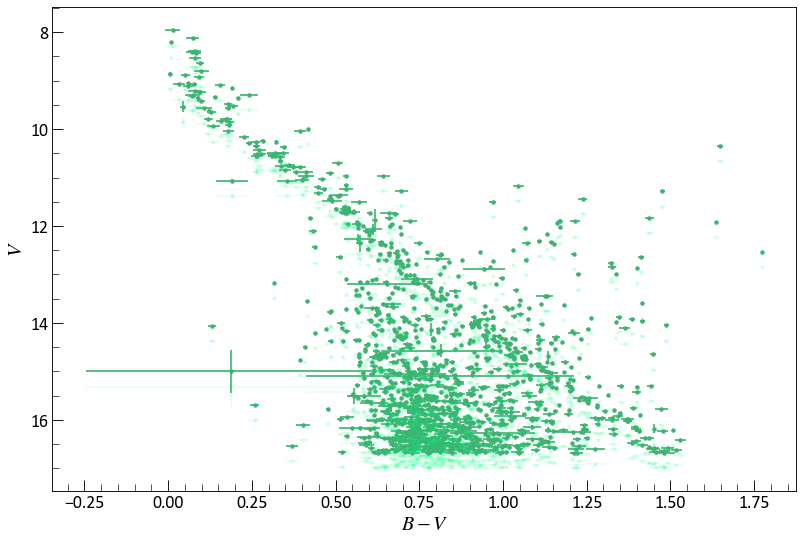

In [21]:
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.errorbar(tabla['BV'],tabla['Vcorr'],xerr=tabla['e_BV'], yerr=tabla['e_Vcorr'],color='mediumseagreen' , fmt='.')
ax.errorbar(tabla['BV'],tabla['Vmag'],xerr=tabla['e_BV'], yerr=tabla['e_V'], color='springgreen', fmt='.', alpha=0.1)

plt.gca().invert_yaxis()
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

plt.show()

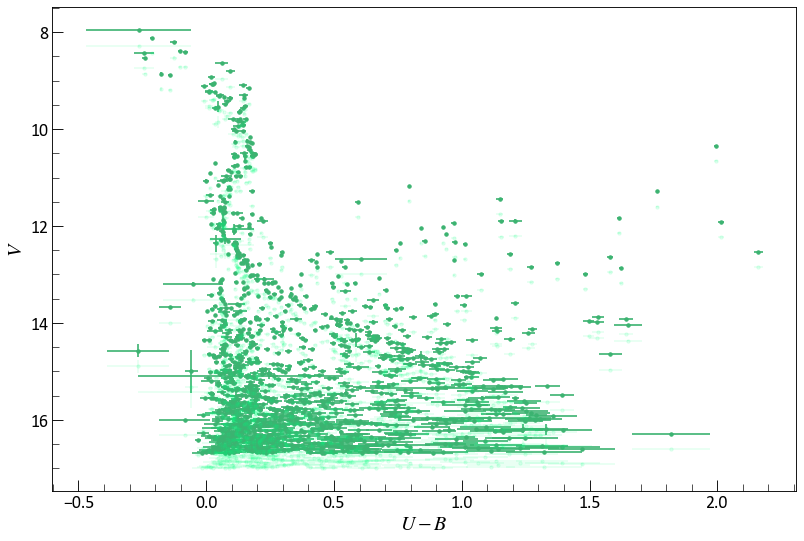

In [22]:
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.errorbar(tabla['UB'],tabla['Vcorr'],xerr=tabla['e_UB'], yerr=tabla['e_Vcorr'],color='mediumseagreen', fmt='.')
ax.errorbar(tabla['UB'],tabla['Vmag'],xerr=tabla['e_UB'], yerr=tabla['e_V'], color='springgreen', fmt='.', alpha=0.1)

plt.gca().invert_yaxis()
ax.set_xlabel('$U-B$')
ax.set_ylabel('$V$')

plt.show()

## 1d)
Estime el módulo de distancia al cúmulo y su error de dos maneras:

-Usando la secuencia principal de edad cero (ZAMS) de Schmidt-Kaler (descargar del Classroom). Compare
con la estimación de Sung et al. (2002). ¿Cómo y cuánto podría afectar a su estimación la presencia de
estrellas binarias?

In [23]:
ZAMSSK=pd.read_csv('ZAMS_SK.dat', sep='\s+', comment='#',      
                  names=['B-V0','U-B0','Mv'])

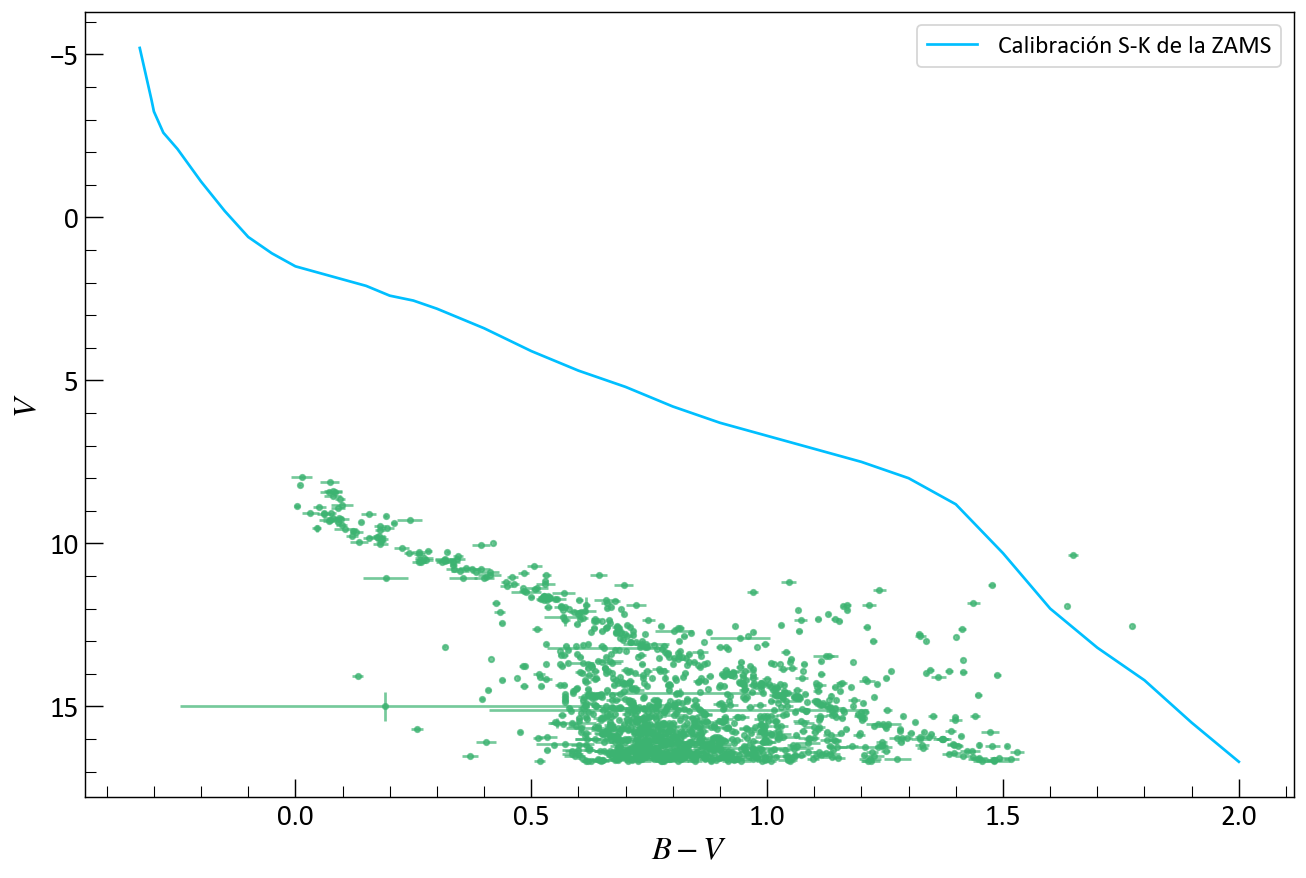

In [24]:
fig, ax = plt.subplots(figsize=(12,8), dpi=130)

ax.errorbar(tabla['BV'],tabla['Vcorr'], xerr=tabla['e_BV'], yerr=tabla['e_Vcorr'],
            color='mediumseagreen', fmt='.', alpha=0.7)
ax.plot(ZAMSSK['B-V0'],ZAMSSK['Mv'], color='deepskyblue', label='Calibración S-K de la ZAMS')

plt.gca().invert_yaxis()
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

plt.legend(fontsize=14)
plt.show()

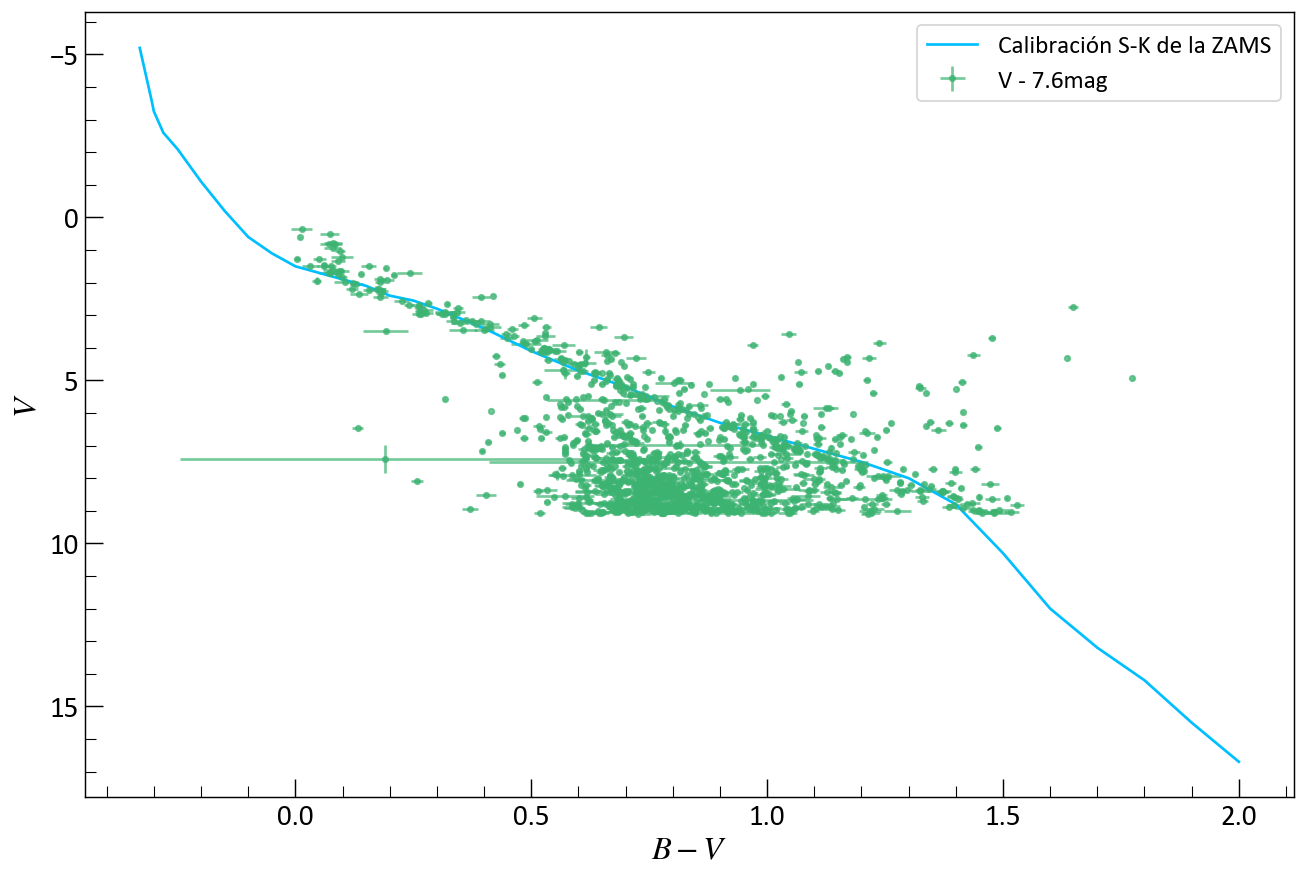

In [25]:
fig, ax = plt.subplots(figsize=(12,8), dpi=130)

ax.errorbar(tabla['BV'],tabla['Vcorr']-7.6, xerr=tabla['e_BV'], yerr=tabla['e_Vcorr'],
            color='mediumseagreen', fmt='.', alpha=0.7, label='V - 7.6mag')
ax.plot(ZAMSSK['B-V0'],ZAMSSK['Mv'], color='deepskyblue', label='Calibración S-K de la ZAMS')

plt.gca().invert_yaxis()
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

plt.legend(fontsize=14)
plt.show()

In [26]:
# Hecho esto, calculamos el módulo de distancia:
# m-M= 5log10(d(pc))-5 =7.6
distancia1 = np.power(10,(7.6+5)/5.)
errdis1 = np.power(10,(7.8+5)/5.) - np.power(10,(7.6+5)/5.)

print('Distancia al cúmulo = ', distancia1, '+/- ', errdis1, '[pc]')

Distancia al cúmulo =  331.1311214825911 +/-  31.94693328751032 [pc]


## (segunda parte)
-Utilizando las magnitudes absolutas calibradas para los tipos espectrales MK (otra vez con la calibración de
Schmidt–Kaler para la secuencia principal). Compare con el valor obtenido en el punto anterior.

In [27]:
# Creamos un nuevo diccionario para cargar las magnitudes absolutas de los TE's a la fotometría
# (previamente filtrada para las estrellas con TE conocido)
V_dict = dict.fromkeys(list(tabla_sp.SpType)) 
V_dict['A0V']=tabla_sk.loc['A0'][0]
V_dict['A2V']=tabla_sk.loc['A2'][0]
V_dict['F0V']=tabla_sk.loc['F0'][0]
V_dict['A1V']=A1[0]
V_dict['B9V']=B9[0]
V_dict['A3V']=A3[0]
V_dict['A7V']=A7[0]
V_dict['A8V']=A8[0]

tabla_sp['MvABS'] = tabla_sp['SpType'].map(V_dict)

# Con las magnitudes absolutas cargadas a la tabla, procedo a calcular las distancias de cada estrella:
tabla_sp['log(d)'] = 1 + (tabla_sp['Vcorr']-tabla_sp['MvABS'])/5.
tabla_sp['errlog'] = 1 + (tabla_sp['Vcorr']+tabla_sp['e_V']-tabla_sp['MvABS'])/5. - tabla_sp['log(d)']
tabla_sp['dist[pc]'] = np.power(10,1 + (tabla_sp['Vcorr']-tabla_sp['MvABS'])/5.)
tabla_sp['errd[pc]'] = np.power(10,tabla_sp['log(d)'] + tabla_sp['errlog']) - np.power(10,tabla_sp['log(d)'])
tabla_sp

,SBL,Vmag,BV,UB,e_V,e_BV,e_UB,Prob,SpType,BV_0,UB_0,E_UB,E_BV,Vcorr,e_Vcorr,MvABS,log(d),errlog,dist[pc],errd[pc]
0,594,10.365,0.394,0.117,0.011,0.019,0.016,0.99,F0V,0.300000,0.030000,0.087000,0.094000,10.049241,0.011,2.700000,2.469848,0.0022,295.017811,1.498260
2,327,9.242,0.091,0.020,0.014,0.015,0.014,0.99,B9V,-0.065000,-0.180000,0.200000,0.156000,8.926241,0.014,0.200000,2.745248,0.0028,556.222094,3.597681
3,420,8.712,0.079,-0.102,0.018,0.019,0.007,NaN,B9V,-0.065000,-0.180000,0.078000,0.144000,8.396241,0.018,0.200000,2.639248,0.0036,435.760877,3.627168
4,753,8.529,0.009,-0.128,0.027,0.001,0.012,0.99,B9V,-0.065000,-0.180000,0.052000,0.074000,8.213241,0.027,0.200000,2.602648,0.0054,400.542160,5.011416
8,772,10.573,0.322,0.114,0.022,0.003,0.006,0.99,A8V,0.240000,0.058000,0.056000,0.082000,10.257241,0.022,2.400000,2.571448,0.0044,372.776251,3.795932
9,888,10.838,0.277,0.108,0.008,0.014,0.011,0.99,A8V,0.240000,0.058000,0.050000,0.037000,10.522241,0.008,2.400000,2.624448,0.0016,421.161085,1.554476
10,936,10.877,0.266,0.150,0.049,0.011,0.008,0.99,A8V,0.240000,0.058000,0.092000,0.026000,10.561241,0.049,2.400000,2.632248,0.0098,428.793542,9.785865
11,1106,10.804,0.318,0.149,0.019,0.022,0.015,0.99,A7V,0.210000,0.072000,0.077000,0.108000,10.488241,0.019,2.250000,2.647648,0.0038,444.271277,3.904351
15,480,10.604,0.241,0.179,0.001,0.010,0.001,0.99,A3V,0.083333,0.066667,0.112333,0.157667,10.288241,0.001,1.516667,2.754315,0.0002,567.956276,0.261614
16,768,10.348,0.180,0.144,0.013,0.016,0.011,0.99,A3V,0.083333,0.066667,0.077333,0.096667,10.032241,0.013,1.516667,2.703115,0.0026,504.794835,3.031130


In [ ]:
# Ahora calculamos los promedios:

dmodprom = (tabla_sp['Vcorr'].sum()-tabla_sp['MvABS'].sum())/len(tabla_sp.index) # Módulo de distancia promedio
errdmodprom = (tabla_sp['Vcorr'].sum()+tabla_sp['e_V'].sum()-tabla_sp['MvABS'].sum())/len(tabla_sp.index) - dmodprom # Error promedio del módulo de distancia
dprom = tabla_sp['dist[pc]'].sum()/len(tabla_sp.index) # Distancia promedio
errdprom = tabla_sp['errd[pc]'].sum()/len(tabla_sp.index) # Error promedio de la distancia

print('Módulo de distancia promedio:', dmodprom, '+/-', errdmodprom)
print('Distancia al Cúmulo:', dprom, '+/-', errdprom, '[pc]')

Módulo de distancia promedio: 8.388546735209237 +/- 0.015833333333333144
Distancia al Cúmulo: 481.74320569391716 +/- 3.5030379080398717 [pc]
